## Effects of China's Bitcoin mining ban

In [1]:
import blocksci
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

chain = blocksci.Blockchain("/BlockSci/config_file")

This work has been done using [PlutoHash.com](https://plutohash.com)

It had been several months since China talked about putting a squeeze on cryptocurrency mining. In June, it all became official, with entire mining farms being dismantled and relocated. The Hashrate of Bitcoin has gone down 46% from the peak of May 2021. It has gone down to 91,2 EH/s from the maximum of 171,4 EH/s, with consequences on the block validation time.

On 27/06 it took an average of 1398 seconds to mine a block, the most since another peak in 2017.

This is an overview of the average validation time per block over the years:

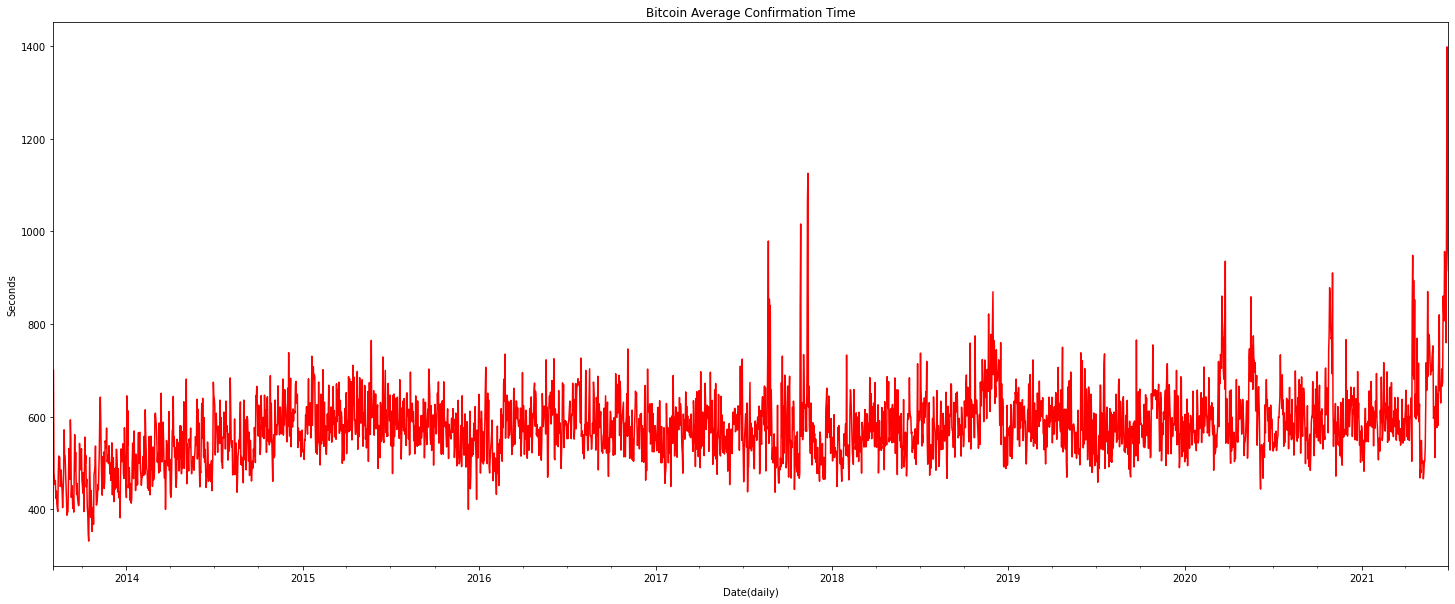

The Sichuan region that was evaluated to host about 50% of the global hashrate of Bitcoin mining (due primarly to low cost of energy during the rain season using hydroelectric energy) has seen quite all mining companies halting activities from the 24:00 of 19th June 2021.

What are the consequences of such brutal and sudden reduction of hashrate? In theory, less competition in mining means less security to prevent the 51% attack, although it is still highly unlikely to happen for many other reasons.

Another consequence is that the difficulty adjusting, which takes place roughly every two weeks, will be the biggest in all Bitcoin history, and it is expected go down about -20%. During this time we shall see longer time to mining blocks, for i.e.

This function iterates along the entire blockchain to extract the information we need to calculate the validation time for each block. We can select the range of blocks we need, in this case our analysis is from block 250000 to 689235. 

With blocksci libraries and the blockchain data provided by [PlutoHash](plutohash.com) we have everything we need to get started.

The code is divided into 3 functions, although technically we don't need moving averages, so there might as well be two:

1. blocks_time() -> creates a dataframe containing the information extracted from the blockchain (height, mining date, etc.)

2. calc_time_validation() -> calculates the validation time from one block to the next

3. calc_moving_averages() -> calculates moving averages based on the window_size parameter

In [2]:
def blocks_time(first_block, last_block):
   
    heights = []
    
    day_month_year = []
    
    hour_min_sec = []
    
    datetime = []
    
    month_list = []
    
    year_list = []
    
    difficulty = []
        
    for y in range(first_block,last_block) :
    
        block_height = chain.blocks[y].height
        
        block_time = chain.blocks[y].time
        
        block_diff = chain.blocks[y].bits
        
        year = str(block_time.year)
        
        month = str(block_time.month)       
                
        date = str(block_time.day) + "-" + str(block_time.month) + "-" + str(block_time.year)
        
        time = str(block_time.hour) + ":" + str(block_time.minute) + ":" + str(block_time.second)
        
                
        
        
        heights.append(block_height)
        
        difficulty.append(block_diff)
        
        month_list.append(month)

        year_list.append(year)

        day_month_year.append(date)
                
        hour_min_sec.append(time)
        
        datetime.append(block_time)

    df = pd.DataFrame(np.column_stack([heights, year_list, month_list, day_month_year, hour_min_sec, datetime, difficulty]), 
                               columns=['block_height', 'year', 'month' ,'d-m-y', 'h-m-s', 'datetime', 'difficulty'])        
        
    return df



In [3]:
df = blocks_time(250000,689235)

439235
439235
year
439235


In [4]:
df

,block_height,year,month,d-m-y,h-m-s,datetime,difficulty
0,250000,2013,8,3-8-2013,12:36:23,2013-08-03 12:36:23,426957810
1,250001,2013,8,3-8-2013,12:47:32,2013-08-03 12:47:32,426957810
2,250002,2013,8,3-8-2013,12:48:37,2013-08-03 12:48:37,426957810
3,250003,2013,8,3-8-2013,13:0:11,2013-08-03 13:00:11,426957810
4,250004,2013,8,3-8-2013,13:7:53,2013-08-03 13:07:53,426957810
...,...,...,...,...,...,...,...
439230,689230,2021,6,30-6-2021,15:44:32,2021-06-30 15:44:32,386801401
439231,689231,2021,6,30-6-2021,15:51:47,2021-06-30 15:51:47,386801401
439232,689232,2021,6,30-6-2021,15:54:53,2021-06-30 15:54:53,386801401
439233,689233,2021,6,30-6-2021,16:36:41,2021-06-30 16:36:41,386801401


In [5]:
def calc_time_validation(df):
    
    datetime_object = df['datetime']
    
    time_duration = []
    
    for k in range(len(datetime_object)):
    
        if k >= 1:
        
            duration = datetime_object[k] - datetime_object[k-1]
                
            duration_in_s = duration.total_seconds()
                
            time_duration.append(duration_in_s)
    
    
    time_duration.insert(0, "NaN")
    
    df.insert(4, 'time to validate block', time_duration)
    
    df = df.iloc[1:]
    
    return df, time_duration

In [6]:
df, time_duration = calc_time_validation(df)

In [7]:
def calc_moving_averages(df, time_duration, window_size):
    
    time_duration.pop(0)
    
    t = 0
    
    moving_averages = []
    
    while t < len(time_duration) - window_size + 1:
        
        this_window = time_duration[t : t + window_size]

        window_average = sum(this_window) / window_size
        
        moving_averages.append(window_average)
        
        t += 1

    print("before Nan:" + str(len(moving_averages)))
    
    p = 0

    for p in range(0, window_size - 1):
    
        moving_averages.insert(0, "NaN")
        
    print("after adding Nan:" + str(len(moving_averages)))
    
    df["moving_averages"] = moving_averages
    
    df = df.iloc[window_size:]
    
    print(len(df))
   
    return df, moving_averages

In [8]:
df, moving_averages = calc_moving_averages(df, time_duration, 15)

before Nan:439220
after adding Nan:439234
439219


In [9]:
df

,block_height,year,month,d-m-y,time to validate block,h-m-s,datetime,difficulty,moving_averages
16,250016,2013,8,3-8-2013,2812.0,15:14:18,2013-08-03 15:14:18,426957810,587.066667
17,250017,2013,8,3-8-2013,735.0,15:26:33,2013-08-03 15:26:33,426957810,631.733333
18,250018,2013,8,3-8-2013,358.0,15:32:31,2013-08-03 15:32:31,426957810,609.333333
19,250019,2013,8,3-8-2013,1236.0,15:53:7,2013-08-03 15:53:07,426957810,660.933333
20,250020,2013,8,3-8-2013,27.0,15:53:34,2013-08-03 15:53:34,426957810,658.8
...,...,...,...,...,...,...,...,...,...
439230,689230,2021,6,30-6-2021,1020.0,15:44:32,2021-06-30 15:44:32,386801401,985.866667
439231,689231,2021,6,30-6-2021,435.0,15:51:47,2021-06-30 15:51:47,386801401,945.0
439232,689232,2021,6,30-6-2021,186.0,15:54:53,2021-06-30 15:54:53,386801401,949.266667
439233,689233,2021,6,30-6-2021,2508.0,16:36:41,2021-06-30 16:36:41,386801401,1000.533333


In [10]:
df = df.reset_index(drop=True)
df

,block_height,year,month,d-m-y,time to validate block,h-m-s,datetime,difficulty,moving_averages
0,250016,2013,8,3-8-2013,2812.0,15:14:18,2013-08-03 15:14:18,426957810,587.066667
1,250017,2013,8,3-8-2013,735.0,15:26:33,2013-08-03 15:26:33,426957810,631.733333
2,250018,2013,8,3-8-2013,358.0,15:32:31,2013-08-03 15:32:31,426957810,609.333333
3,250019,2013,8,3-8-2013,1236.0,15:53:7,2013-08-03 15:53:07,426957810,660.933333
4,250020,2013,8,3-8-2013,27.0,15:53:34,2013-08-03 15:53:34,426957810,658.8
...,...,...,...,...,...,...,...,...,...
439214,689230,2021,6,30-6-2021,1020.0,15:44:32,2021-06-30 15:44:32,386801401,985.866667
439215,689231,2021,6,30-6-2021,435.0,15:51:47,2021-06-30 15:51:47,386801401,945.0
439216,689232,2021,6,30-6-2021,186.0,15:54:53,2021-06-30 15:54:53,386801401,949.266667
439217,689233,2021,6,30-6-2021,2508.0,16:36:41,2021-06-30 16:36:41,386801401,1000.533333


In [12]:
df2 = df[["datetime","time to validate block"]]
df2 = df2.set_index('datetime')
df2['time to validate block'] = df2['time to validate block'].astype(str).astype(float)

times = df2["time to validate block"]
means = times.groupby(pd.Grouper(freq='1D')).mean()
means

datetime
2013-08-03     700.291667
2013-08-04     479.743017
2013-08-05     463.825397
2013-08-06     454.200000
2013-08-07     462.123656
                 ...     
2021-06-26    1005.764045
2021-06-27    1398.327586
2021-06-28    1041.261364
2021-06-29     955.411111
2021-06-30     915.378788
Freq: D, Name: time to validate block, Length: 2889, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Average Confirmation Time'}, xlabel='Date(daily)', ylabel='Seconds'>

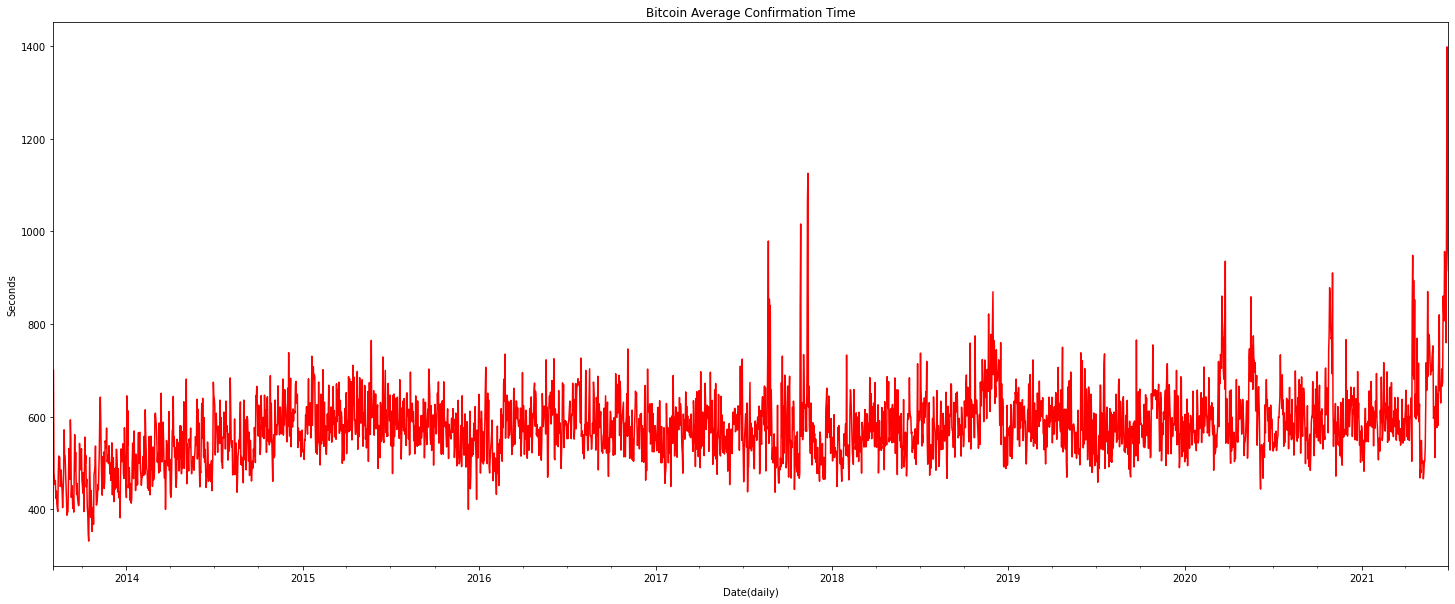

In [13]:
means.plot.line( 
                title="Bitcoin Average Confirmation Time",
                ylabel="Seconds", 
                xlabel="Date(daily)",
                color={"time to validate block": "#ff0000" },
               figsize=(25,10))